# 워드클라우드

In [39]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [40]:
import nltk
from konlpy.tag import Okt
from konlpy.corpus import kobill

### 저장되어 있는 데이터 읽어오기
- 문자열 형태

In [41]:
f = open('./result/전기차_210415_to_210420_res.txt', 'r', encoding='UTF8')
text = f.read().replace('\n', ' ')      # 개행문자 제거
f.close()

In [42]:
type(text)

str

In [43]:
text[:500]

'answer wher 님 답변 현대위아 주가를 비롯해 전기차 관련주들이 가끔 한번씩 이슈를 타곤 하지만 현대위아 주가는 조만간 오를 것 같다고 생각합니다 위 답변은 답변작성자가 경험과 지식을 바탕으로 작성한 내용입니다 포인트로 감사할 때 참고해주세요 시간 전 비공개 답변 물론 전기차 시장이 큰 이슈를 받았던 과거와 비교하자면 현재는 이슈도 많이 없고 주가가 떨어지고 있는 추세이긴 하지만 아직 전기차가 국내 시장에 자리를 잡지 못했다는 점 미래 전망이 아직 밝다는 점을 비추어볼 때 아직 가능성은 있다고 생각합니다 다만 그 시점이 언제가 될지는 뉴스들을 꾸준히 확인하고 기업의 재무제표 등을 확인함으로써 꾸준히 분석을 해야하기 때문에 지금 당장 투자를 하기보다는 천천히 관망하시다가 괜찮다고 판단하는 시점에 들어가시는 것을 추천드리고 싶습니다 특정 주식 분야의 주식종목들 중에서 어떤 주식종목의 주식가격이 높게 오를지 내용을 찾고 계신다면 유명한 카페나 커뮤니티만 살펴보는 것 보다 상위  전'

### 토큰화

In [44]:
okt = Okt()
tokens_ko = okt.nouns(text)
tokens_ko[:10]

['답변', '대위', '주가', '비롯', '전기차', '관련', '주', '가끔', '한번', '이슈']

In [45]:
ko = nltk.Text(tokens_ko, name='전기차')
len(ko.tokens), len(set(ko.tokens))

(62766, 4533)

In [46]:
# 가장 많이 나온 단어 Top 20
ko.vocab().most_common(20)

[('답변', 1758),
 ('렌트', 888),
 ('할부', 883),
 ('리스', 823),
 ('중고차', 760),
 ('상담', 755),
 ('신차', 719),
 ('위', 697),
 ('견적', 636),
 ('때', 601),
 ('차량', 567),
 ('내용', 562),
 ('참고', 562),
 ('작성', 546),
 ('지식', 519),
 ('작성자', 513),
 ('포인트', 505),
 ('장기', 505),
 ('경험', 500),
 ('바탕', 498)]

In [47]:
# 불용어 설정
stop_words = [
    '답변', '작성', '작성자', '위', '때', '포인트', '비롯', '가끔', '주', '한번',
    '관련', '것', '참고', '곳', '등', '시', '수', '및', '열심', '년', '도', '분'
]

ko = [each_word for each_word in ko if each_word not in stop_words]
ko[:10]

['대위', '주가', '전기차', '이슈', '대위', '주가', '조만간', '생각', '경험', '지식']

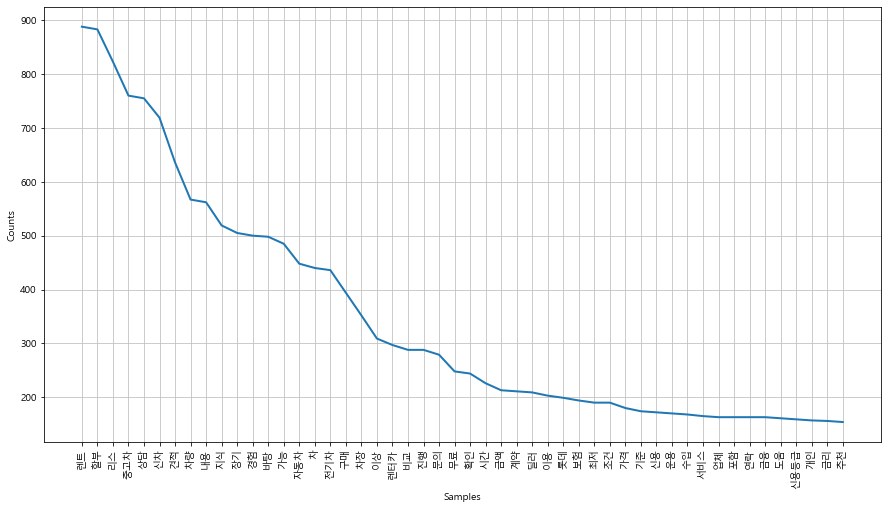

In [48]:
# 단어별 빈도수 그래프
ko = nltk.Text(ko, name='전기차')

plt.figure(figsize=(15, 8))
ko.plot(50)
plt.show()

### 워드클라우드

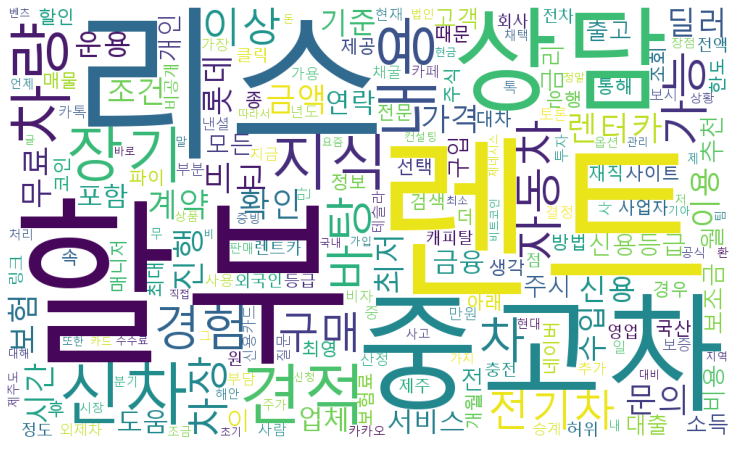

In [50]:
from wordcloud import WordCloud
from PIL import Image
data = ko.vocab().most_common(200)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling=0.2,
                      background_color='white',
                      width=1000, height=600
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

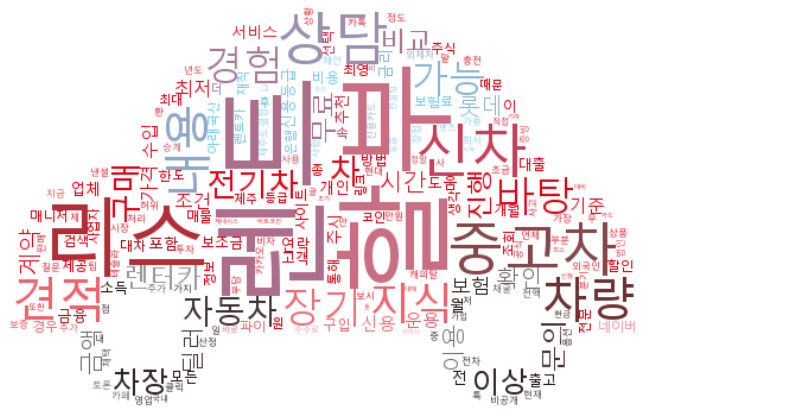

In [74]:
from wordcloud import ImageColorGenerator
mask = np.array(Image.open('./img/car.jpeg'))
image_colors = ImageColorGenerator(mask)

wc = WordCloud(
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.1, mask=mask,
    background_color='white',
    min_font_size=1,
    max_font_size=100
).generate_from_frequencies(dict(data))

plt.figure(figsize=(14, 14))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()